This notebook illustrates some of the basic functionalities of the partyembed package in Beta release.

In [1]:
from partyembed.explore import Explore
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the pre-trained House model as an Explore object.
m = Explore(model = 'House')

In [3]:
m.validate()

Pearson Correlation Coefficient:
voteview: 0.918

Spearman Rank Correlation Coefficient:
voteview: 0.896

Pairwise Accuracy:
voteview: 85.96%



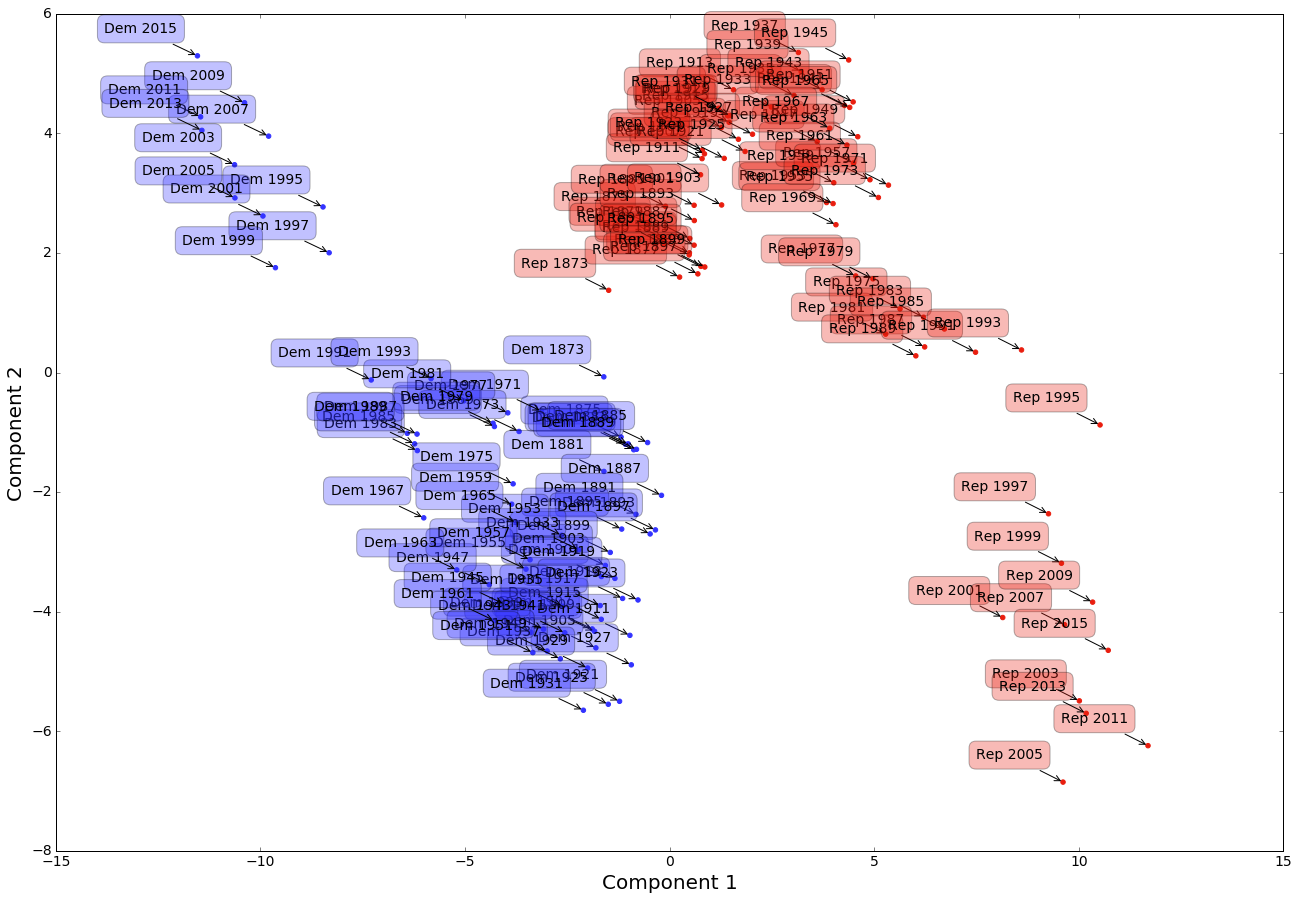

In [4]:
# Plotting the default PCA dimension reduction in 2D.
m.plot()

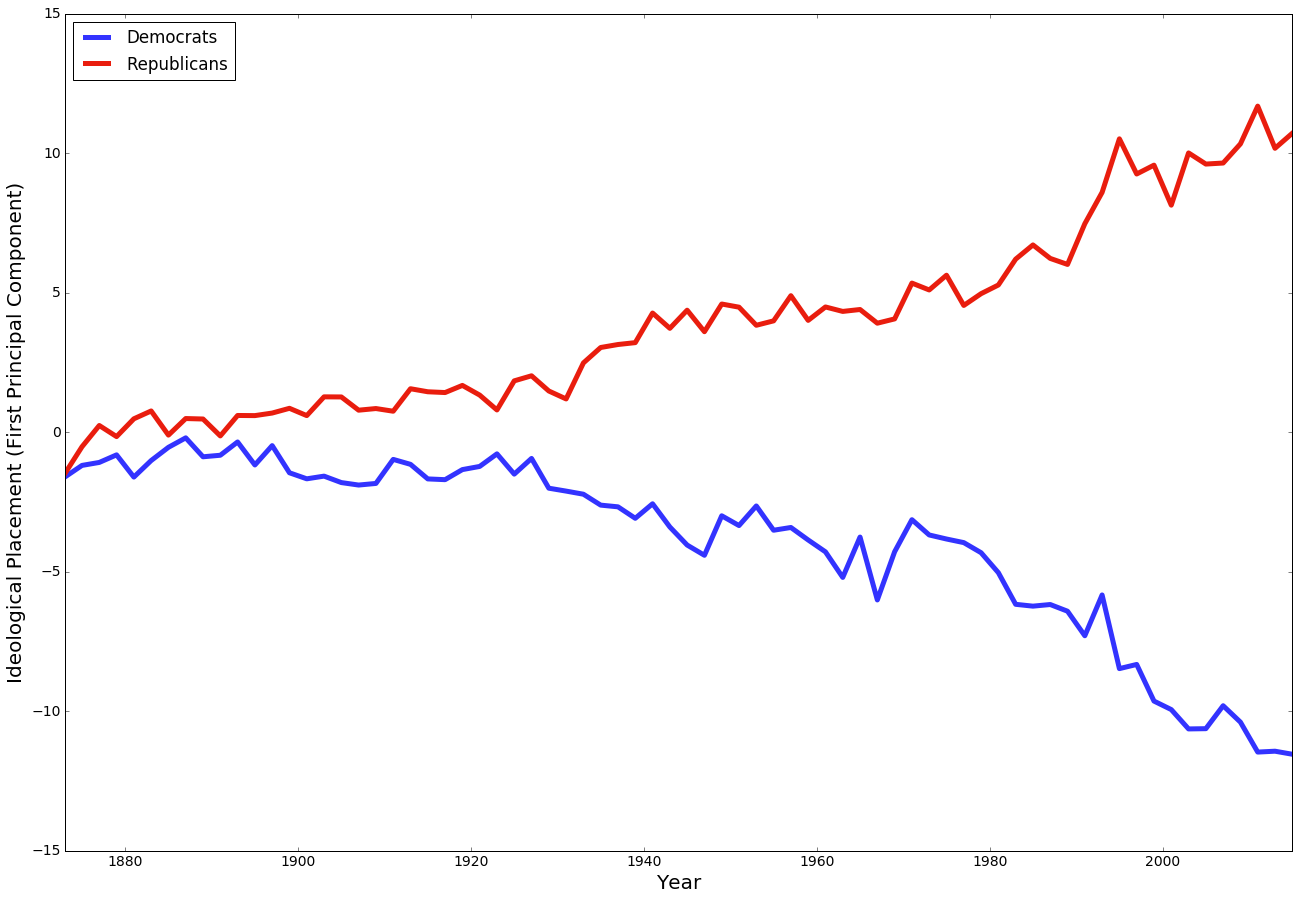

In [5]:
# Plotting time series of first component
m.plot_timeseries(dimension=1)

In [6]:
# Finding words with high and low correlation with each axis.
m.interpret()

Words associated with positive values on dimension 1:

bureaucracy, bureaucracies, bureaucratic, nebraska, regimentation, bureaucrats, missouri river, obamacare, centralized, redtape, kansas, hatch act, charter schools, captive nations, free enterprise, hoover commission, lenin, communist, feed grains, wheat

Words associated with negative values on dimension 1:

congressional black caucus, wealthiest, decent housing, south african, slums, racism, poor elderly, africanamericans, latinos, africanamerican, segregated, civil rights, gun violence, apartheid, african, poorest, joint resolution res, tax breaks, brooklyn, richest

Words associated with positive values on dimension 2:

detroit, buffalo, seattle, minneapolis, vermont, duluth, rochester, lake erie, debt gratitude, lake michigan, erie, cleveland, cleanup, retraining, toledo, maine, trade adjustment assistance, oregon, chicago, recycling

Words associated with negative values on dimension 2:

brooks, usury, sam houston, parishes, 

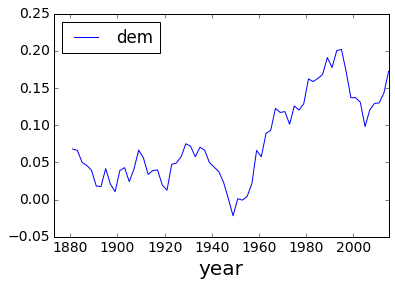

In [7]:
# Create a topic vector and plot the similarity of that topic with party embeddings.
# By default, the 'issue' method returns a 5-period moving average in a pandas data frame.
env = m.issue("environment")
env.plot(x = 'year', y='dem')

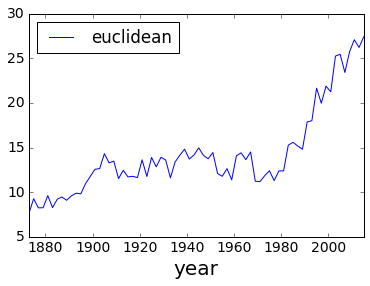

In [8]:
# Create a basic time-series plot of party polarization.
m.polarization().plot(x='year',y='euclidean')

In [9]:
# Run the validation against gold standards.
m.validate()

Pearson Correlation Coefficient:
voteview: 0.918

Spearman Rank Correlation Coefficient:
voteview: 0.896

Pairwise Accuracy:
voteview: 85.96%



In [10]:
# Exploring the guided method with default vocabulary mentioned in the article.
m = Explore(model = 'House', method='guided')

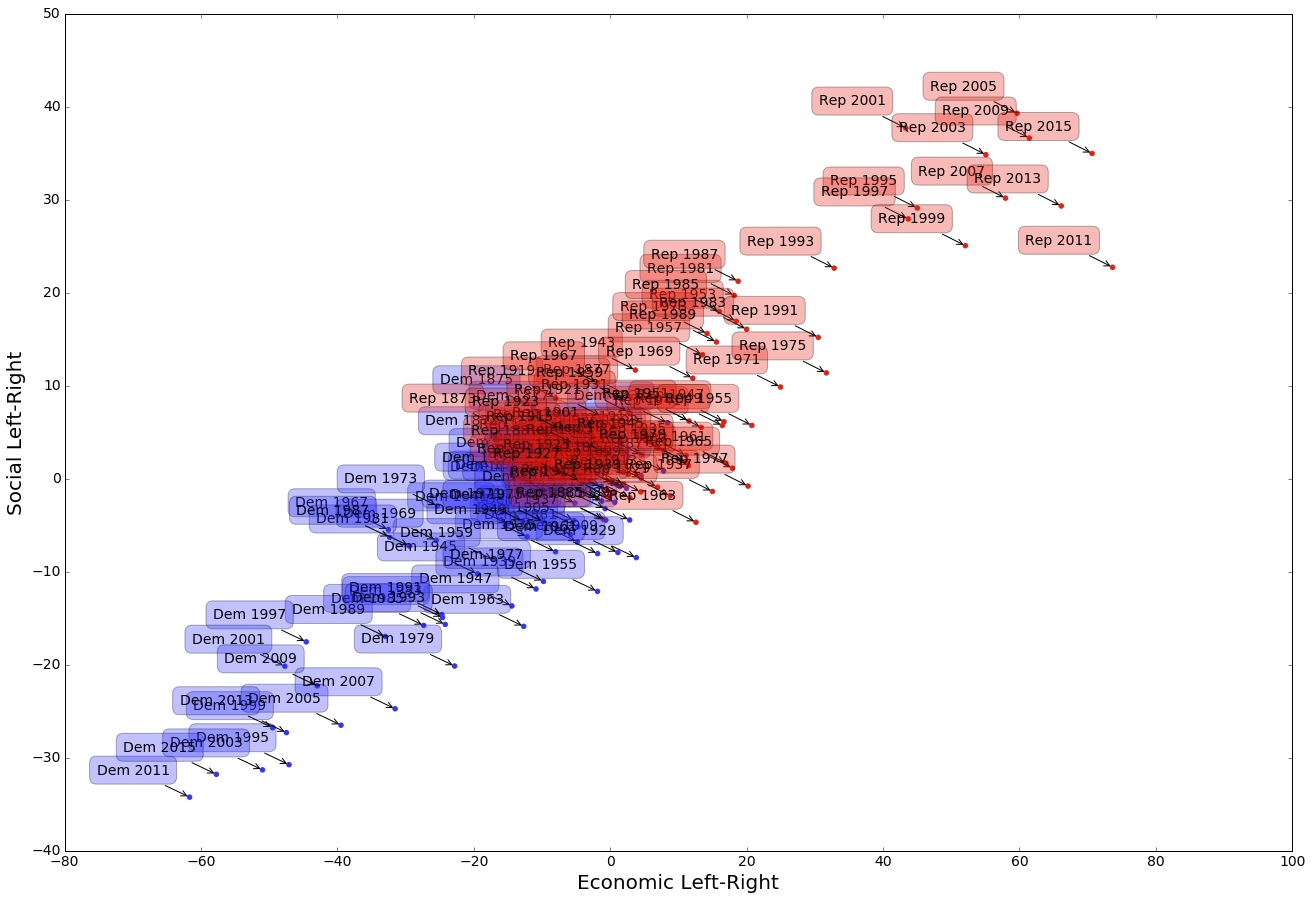

In [11]:
# Plotting the projection on customized axes.
m.plot()

In [12]:
# Using the model as a gensim Doc2Vec object.
model = m.model

In [13]:
# Finding most similar words.
model.wv.most_similar('environment')

[('protecting_environment', 0.6044716835021973),
 ('healthy_environment', 0.5966728925704956),
 ('clean_air_clean_water', 0.5914993286132812),
 ('clean_water_clean_air', 0.5612006187438965),
 ('environments', 0.5548286437988281),
 ('environmental', 0.5505703091621399),
 ('ecology', 0.528766393661499),
 ('environmental_protection', 0.5244860053062439),
 ('air_breathe', 0.5212933421134949),
 ('air_breathe_water_drink', 0.5074530839920044)]

In [14]:
# Finding words most similar to Democrats, 114th Congress.
model.wv.similar_by_vector(model.docvecs['D_114'])

[('hispanic_caucus', 0.4023011326789856),
 ('gentlewoman_california', 0.3825967311859131),
 ('close_gun_loophole', 0.36160194873809814),
 ('congressional_black_caucus', 0.3481924831867218),
 ('latinos', 0.3448483943939209),
 ('environmental_protections', 0.3427249491214752),
 ('velizquez', 0.3404727578163147),
 ('roybalallard', 0.3370061218738556),
 ('lois_capps', 0.33679136633872986),
 ('latino', 0.33004531264305115)]